In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno

from datetime import datetime
import matplotlib.pyplot as plt

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [168]:
# Read in the CSV and create dataframe

dams_df = pd.read_csv('Data Sets/SAOD_dam levels individual.csv', encoding='unicode_escape')

dams_df.head()

,number,station_no,dam_name,reservoir,latitude,longitude,province,wma,place,catchment_area,...,_20160118_percent_full,_20160125_percent_full,_20160201_percent_full,_20160208_percent_full,_20160215_percent_full,_20160229_percent_full,_20160307_percent_full,_20160314_percent_full,_20160321_percent_full,_2015_week_11_percent_full
0,1.0,A1R001,Ngotwane Dam,Ngotwane,25.19860,25.81322,NW,3.0,Ngotwane River @ Ngotwane Dam,518.0,...,3.5,NaN,5.9,5.5,4.9,4.7,4.6,NaN,9.2,17.9
1,2.0,A2R001,Hartbeespoort Dam,Hartbeespoort,25.72564,27.84849,NW,3.0,Krokodil River @ Hartbeespoort Dam,4014.0,...,89.4,NaN,97.5,96.6,98.0,97.6,96.5,98.7,99.4,96.8
2,3.0,A2R002,Bon Accord Dam,Bon Accord,25.62257,28.19138,G,3.0,Apies River @ Bon Accord Dam,315.0,...,108.1,NaN,106.6,109.9,106.6,104.5,103.0,110.9,106.6,107.5
3,4.0,A2R003,Olifantsnek Dam,Olifantsnek,25.78556,27.25921,NW,3.0,Hex River @ Olifantsnek Dam,493.0,...,40.2,NaN,37.0,36.0,35.0,32.9,32.9,31.4,38.6,71.7
4,5.0,A2R004,Rietvlei Dam,Rietvlei,25.87653,28.26519,G,3.0,Hennops River @ Rietvlei Dam,481.0,...,90.9,NaN,94.6,NaN,NaN,NaN,NaN,100.2,102.2,101.7



<font color='red'>-------------------------------------------------------------------------------------------- DATA CLEANING --------------------------------------------------------------------------------------------</font>


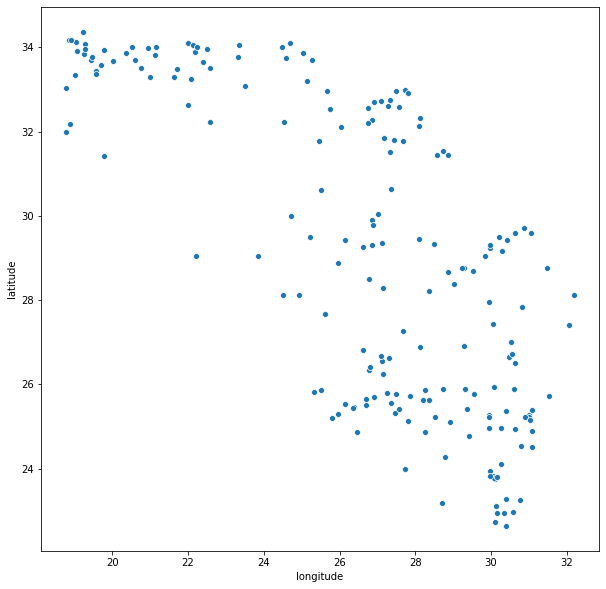

In [134]:
# Scatter plot of longitude and latitude points

plt.figure(figsize=(10,10))
ax1 = sns.scatterplot(x='longitude', y='latitude', data=dams_df)

# The results seem grouped as expected, with no indication of incorrect 
# coordinates. A thorough geographical plot will be generated once the 
# df is clean

AxesSubplot(0.125,0.125;0.775x0.755)


number                                                     123
station_no                                              D7R001
dam_name                                       Boegoeberg Dam 
reservoir                                           Boegoeberg
latitude                                               29.0411
longitude                                              22.2023
province                                                    NC
wma                                                         14
place                            Orange River @ Boegoeberg Dam
catchment_area                                          343050
fsc_1_000_000m_million_m                                19.815
type                                             Balancing Dam
actual_lvl_20151130_million_m                           20.764
actual_lvl_20151207_million_m                            19.43
actual_lvl_20151214_million_m                           21.137
actual_lvl_20151221_million_m                          

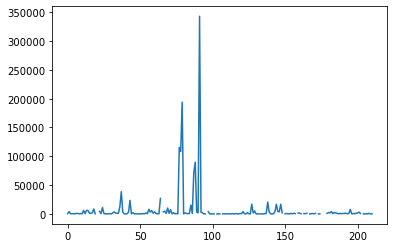

In [169]:
# A line plot is generated for each ocntinuous data type column, 
# making it easy to pick out outliers and conduct further research 
# to verify the data

print(dams_df.loc[:, 'catchment_area'].plot.line())

# The line shows a major peak at around x-marker 90

dams_df.loc[dams_df['catchment_area'].idxmax()]

# Printing out the full record, we see it is Boegoeberg Dam, a dam which
# is part of the Orange River. This may be the reason for the massive 
# catchment area.

AxesSubplot(0.125,0.125;0.775x0.755)


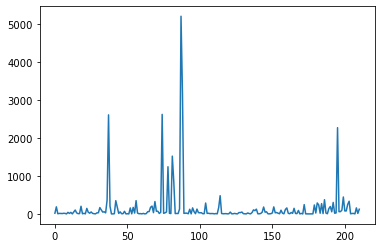

In [170]:
# Dam capacities plot

print(dams_df.loc[:, 'fsc_1_000_000m_million_m'].plot.line())

In [131]:
# It was found that a dam capacity was potentially an outlier. The 
# record in question was pinpointed and displayed below. The record is for 
# Gariep Dam which is South Africa largest dam. The data was verified 
# and is correct.

find = dams_df.iloc[:, 10] > 4000
find[find == True]

dams_df.loc[87, ['dam_name', 'fsc_1_000_000m_million_m']]

dam_name                    Gariep Dam 
fsc_1_000_000m_million_m        5196.04
Name: 87, dtype: object

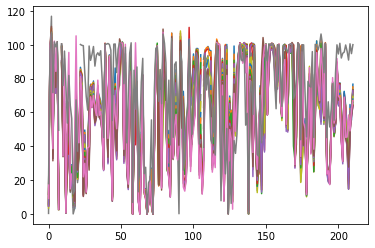

In [171]:
# THe following plot was generated by running a for loop through the 
# "Percent Full" columns. As expected the data varies between 0 and 100% 
# with a few points above the 100% mark. 

for col in range (28, 46):
    dams_df.iloc[:, col].plot.line()
    
# For these instances, it is common for the same dams to reflect greater 
# than 100% full. In other cases, it is possible that the dams are filled 
# beyond their designed capacity. This does not corrupt the data and is 
# assumed to be accurate.

In [152]:
# Data type formatting

for col in range (0, 46):
    print(dams_df.columns.values[col])
    print("--> ",dams_df.iloc[:, col].dtype)
    
# The data types are correct once matched up to the df columns

number
-->  float64
station_no
-->  object
dam_name
-->  object
reservoir
-->  object
latitude
-->  float64
longitude
-->  float64
province
-->  object
wma
-->  float64
place
-->  object
catchment_area
-->  float64
fsc_1_000_000m_million_m
-->  float64
type
-->  object
actual_lvl_20151130_million_m
-->  float64
actual_lvl_20151207_million_m
-->  float64
actual_lvl_20151214_million_m
-->  float64
actual_lvl_20151221_million_m
-->  float64
actual_lvl_20151228_million_m
-->  float64
actual_lvl_20160104_million_m
-->  float64
actual_lvl_20160111_million_m
-->  float64
actual_lvl_20160118_million_m
-->  float64
actual_lvl_20160125_million_m
-->  float64
actual_lvl_20160201_million_m
-->  float64
actual_lvl_20160208_million_m
-->  float64
actual_lvl_20160215_million_m
-->  float64
actual_lvl_20160229_million_m
-->  float64
actual_lvl_20160307_million_m
-->  float64
actual_lvl_20160314_million_m
-->  float64
actual_lvl_20160321_million_m
-->  float64
_20151123_percent_full
-->  float64
_20151

<font color='red'>-------------------------------------------------------------------------------------------- MISSING DATA --------------------------------------------------------------------------------------------</font>

In [172]:
# Number of missing values per column and percentage of missing data per column

print(df.isnull().shape)    # overall df row and column count
print(df.isnull().sum())    # per column
print(df.isnull().sum()/211)   # percent per column, taken as total isnull() divided by number of rows in df

(211, 46)
number                             3
station_no                         0
dam_name                           0
reservoir                          2
latitude                          16
longitude                         16
province                           0
wma                                2
place                             16
catchment_area                    16
fsc_1_000_000m_million_m           0
type                             193
actual_lvl_20151130_million_m      6
actual_lvl_20151207_million_m     23
actual_lvl_20151214_million_m     12
actual_lvl_20151221_million_m     18
actual_lvl_20151228_million_m    211
actual_lvl_20160104_million_m    211
actual_lvl_20160111_million_m      6
actual_lvl_20160118_million_m      5
actual_lvl_20160125_million_m    211
actual_lvl_20160201_million_m     10
actual_lvl_20160208_million_m     11
actual_lvl_20160215_million_m      9
actual_lvl_20160229_million_m      9
actual_lvl_20160307_million_m     11
actual_lvl_20160314_million_

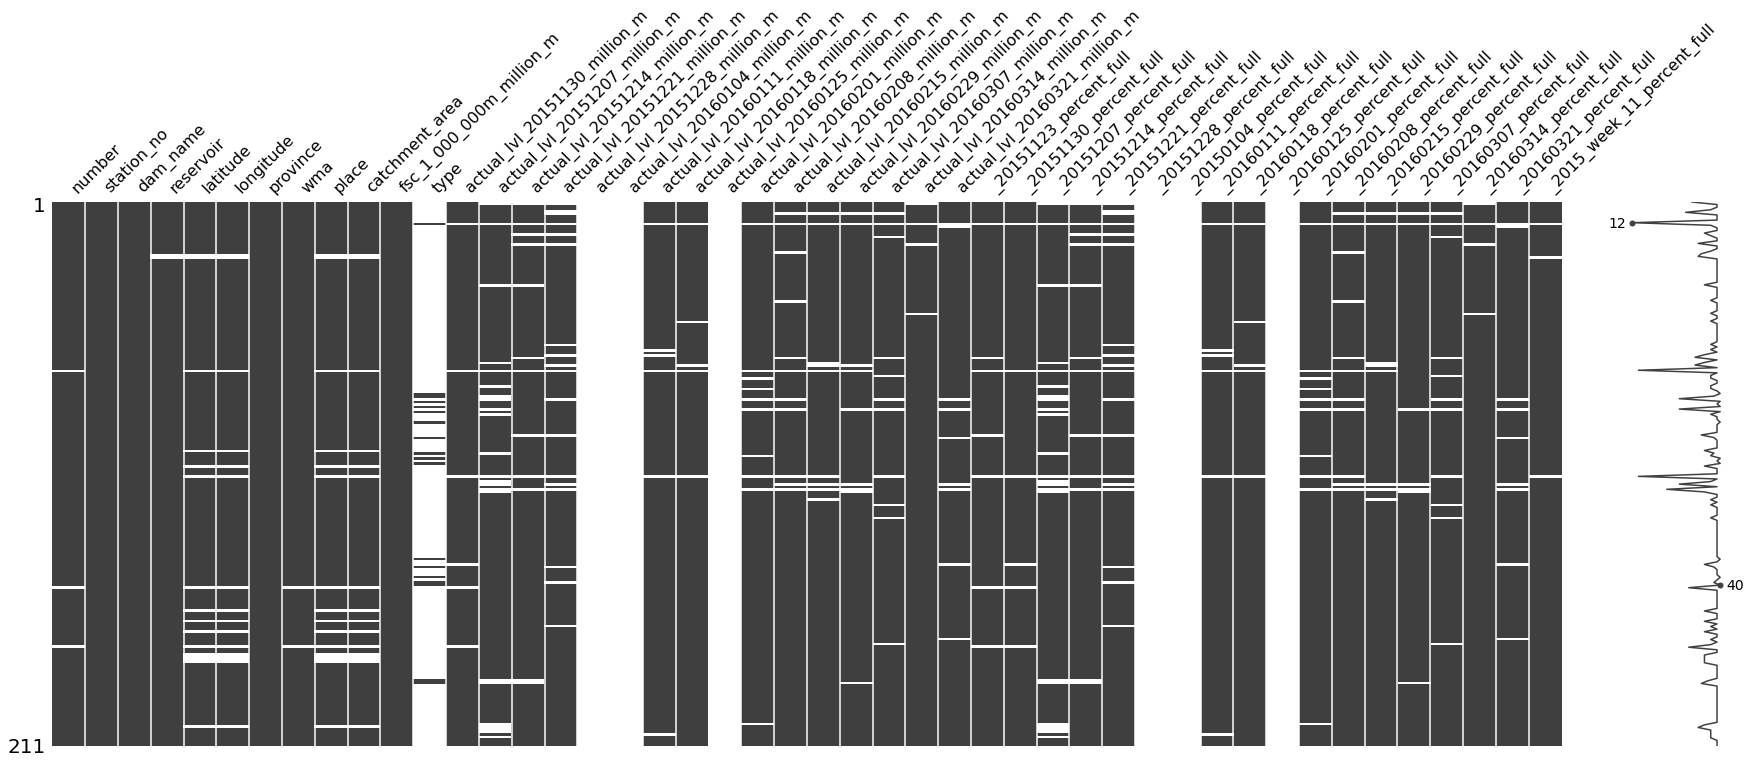

In [173]:
# Plot graphic indicating the degree of missingness

missingno.matrix(dams_df, figsize = (30,10))

In [174]:
# isnull() analysis of each row, returning rows with a high 
# number of blank data points which are to be dropped from the df

test = dams_df.isnull().sum(axis=1) > 15
test[test == True]


4      True
8      True
65     True
76     True
80     True
106    True
109    True
111    True
149    True
172    True
dtype: bool

In [175]:
# Dropping all columns and rows with high degree of missingness

dams_clean = dams_df.drop(['type', 'actual_lvl_20151228_million_m', 
                'actual_lvl_20160104_million_m', 'actual_lvl_20160125_million_m', 
                '_20151228_percent_full', '_20150104_percent_full', 
                '_20160125_percent_full'], axis=1)

dams_clean = dams_clean.drop([4, 8, 65, 76, 80, 106, 109, 
                111, 149, 172], axis=0)

number
station_no
dam_name
reservoir
latitude
longitude
province
wma
place
catchment_area
fsc_1_000_000m_million_m
actual_lvl_20151130_million_m
actual_lvl_20151207_million_m
actual_lvl_20151214_million_m
actual_lvl_20151221_million_m
actual_lvl_20160111_million_m
actual_lvl_20160118_million_m
actual_lvl_20160201_million_m
actual_lvl_20160208_million_m
actual_lvl_20160215_million_m
actual_lvl_20160229_million_m
actual_lvl_20160307_million_m
actual_lvl_20160314_million_m
actual_lvl_20160321_million_m
_20151123_percent_full
_20151130_percent_full
_20151207_percent_full
_20151214_percent_full
_20151221_percent_full
_20160111_percent_full
_20160118_percent_full
_20160201_percent_full
_20160208_percent_full
_20160215_percent_full
_20160229_percent_full
_20160307_percent_full
_20160314_percent_full
_20160321_percent_full
_2015_week_11_percent_full


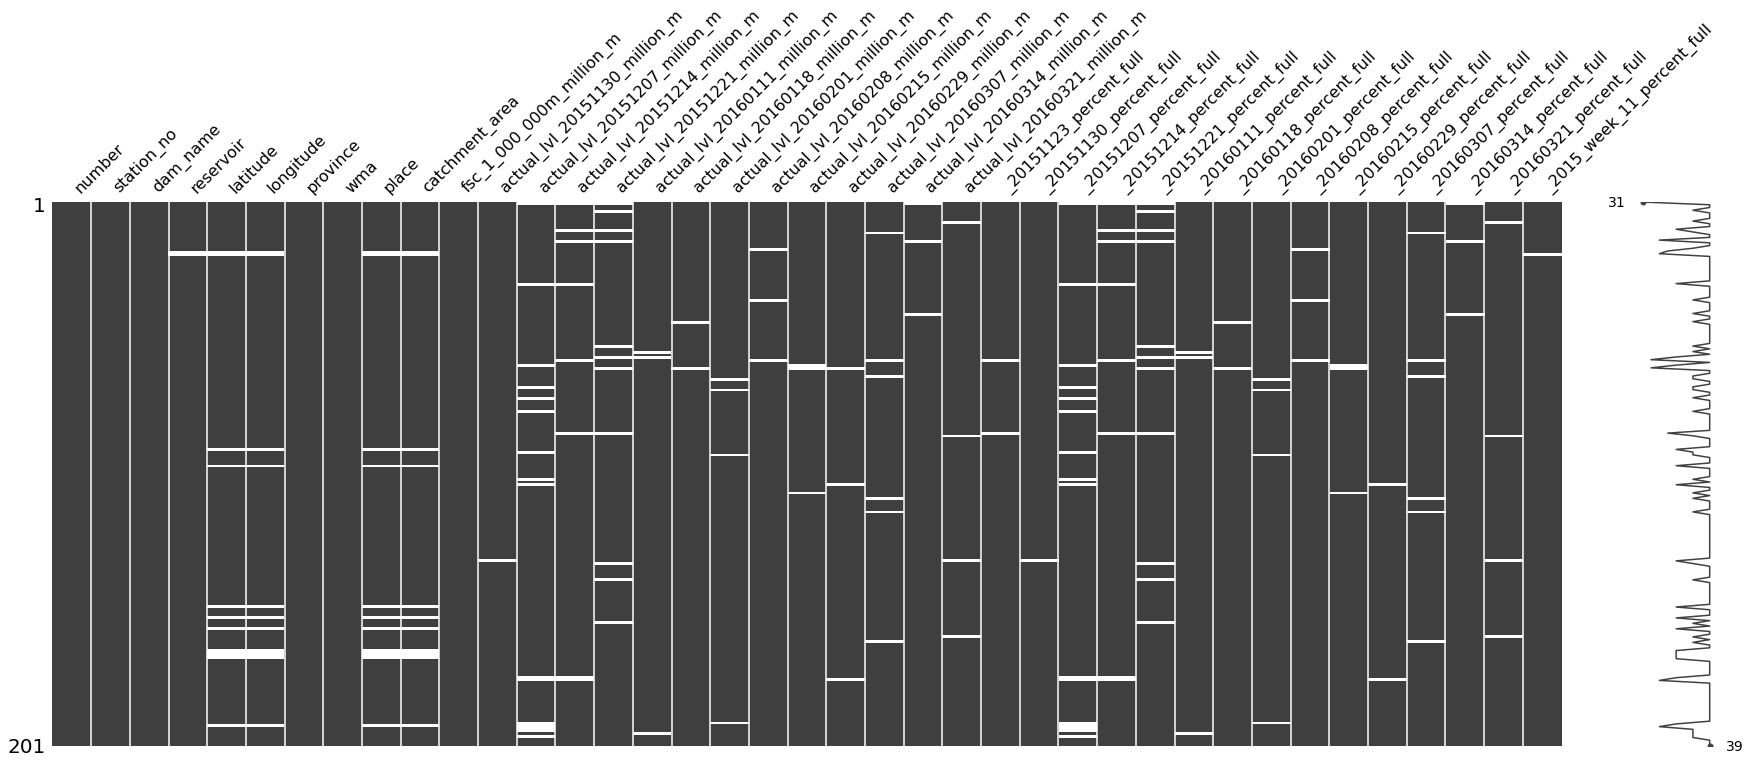

In [110]:
for col in dams_clean:
    print(col)

dams_clean.shape
    
missingno.matrix(dams_clean, figsize = (30,10))

<font color='red'>----------------------------------------------------------------------------- DATA STORIES AND VISUALIZATIONS -----------------------------------------------------------------------------</font>

In [203]:
# A new CSV file is created to export the dam coordinates into.
# This is to create a file for a geoplotlib analysis.
# The relevant columns are written to the new CSV file

coordinates_df = dams_df[['dam_name', 'latitude', 'longitude']]
coordinates_df = coordinates_df.dropna()

# The latitude coordinates need to be converted to a negative 
# value to reflect in the Souther hemisphere

coordinates_df['latitude'] = -1 * coordinates_df['latitude']
coordinates_df.rename(columns={'dam_name':'name',
                              'latitude':'lat',
                              'longitude':'lon'}, 
                      inplace=True)

coordinates_df.to_csv(r'C:\Users\Lenovo\Dropbox\Online Courses\HyperionDev\Justin Bainbridge-50830\Data Analytics and Exploration\Task 18\Data Sets\Dam Coordinate List.csv', index = False)

In [204]:
# A grographic layout of all longitude and latidude coordinates across South Africa

import geoplotlib
thedata = geoplotlib.utils.read_csv('Data Sets/Dam Coordinate List.csv')
geoplotlib.dot(thedata)
geoplotlib.show()

A map representing all recorded dam locations generated with geoplotlib

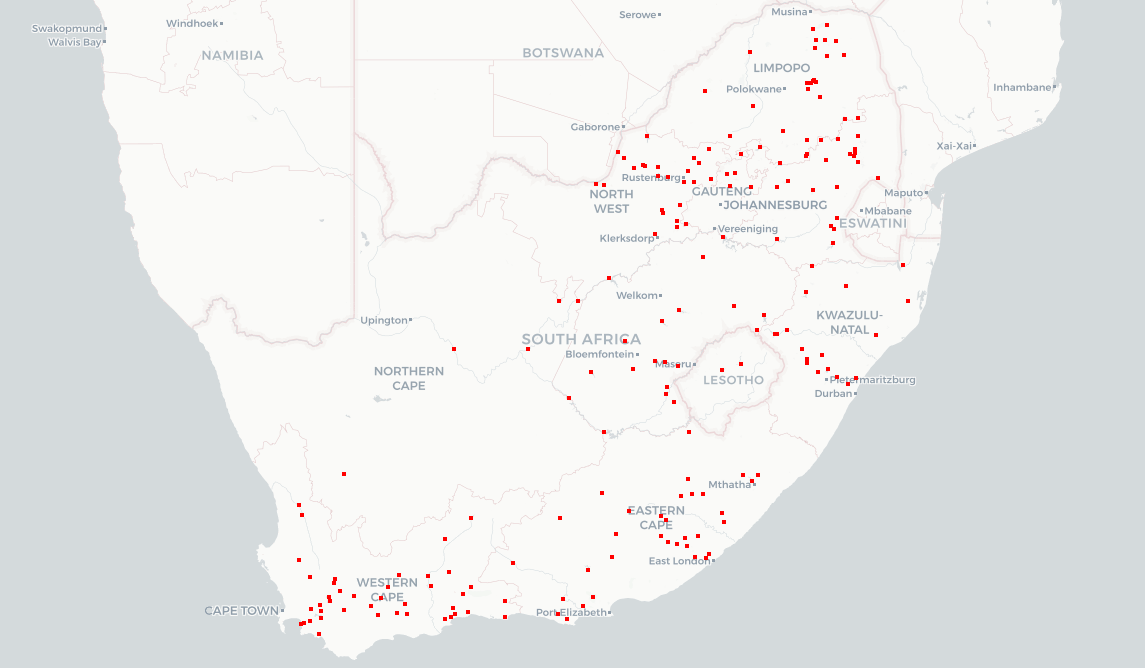

<function matplotlib.pyplot.show(*args, **kw)>

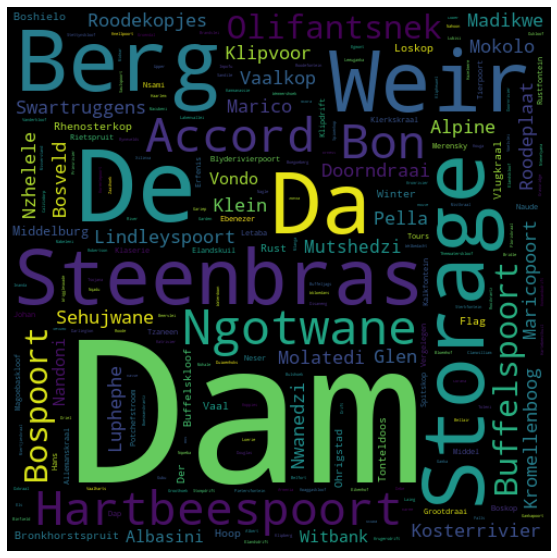

In [704]:
# A wordcloud graphic generated to show the array of dams which are included in the CSV

from wordcloud import WordCloud

dam_name_list = dams_clean['dam_name'].unique()
text = (', '.join(province_unique_list))
text

wordcloud = WordCloud(width=500, height=500, margin=10).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

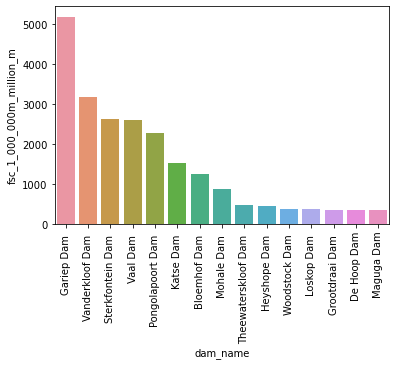

In [224]:
# A bar chart distribution showing the 15 largest dams 
# sorted by maximum capacity

largest_vol = dams_df.nlargest(15, 'fsc_1_000_000m_million_m')
largest_vol = largest_vol[['dam_name', 'fsc_1_000_000m_million_m']]
largest_vol

ax = sns.barplot(x=largest_vol['dam_name'], y=largest_vol['fsc_1_000_000m_million_m'], data=largest_vol)
plt.xticks(rotation='vertical')

In [769]:
# Line graph showing the levels of Gariep Dam throughout the period.
# An additional line has been included to show the actual 
# capacity of the dam when full

gariep_info = dams_df.loc[87, :]
gariep_info = gariep_info.dropna()
#gariep_info = gariep_info[11:24]    # Dam levels data
gariep_info = gariep_info[25:38]
gariep_info
#max_capacity = dams_df.loc[87, 'fsc_1_000_000m_million_m']    # Maximum design capacity

#ax1 = gariep_info.plot(title = 'Gariep Dam Levels', xticks = (range(1,13)), yticks = (range(2000,5500, 500)))
#plt.xticks(rotation='vertical')

#ax2 = plt.axhline(y=max_capacity, color='r', linestyle='-')

_20151130_percent_full    53.4
_20151207_percent_full    52.5
_20151214_percent_full    51.5
_20151221_percent_full    50.6
_20160111_percent_full    47.6
_20160118_percent_full    47.2
_20160201_percent_full    48.9
_20160208_percent_full    49.2
_20160215_percent_full    49.3
_20160229_percent_full    53.9
_20160307_percent_full    53.9
_20160314_percent_full    52.6
_20160321_percent_full    52.4
Name: 87, dtype: object

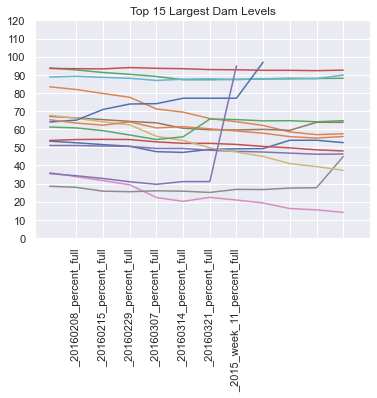

In [780]:
# A similar analysis conducted on the top 10 largest
# dams to determine if all are sitting at around 50%

for dam in largest_vol['dam_name']:
    dam
    
list_15 = list(largest_vol.index)

#ax1 = plt.figure(figsize=(20,5))
#plt.figure()
for index in list_15:
    dam_info = dams_df.loc[index, :]
    dam_info = dam_info.dropna()
    dam_info = dam_info[25:37]    # Dam levels data
    max_capacity = dams_df.loc[index, 'fsc_1_000_000m_million_m']    # Maximum design capacity
    dam_info.plot(title = 'Top 15 Largest Dam Levels', xticks = (range(1,13)), yticks = (range(0,130, 10)))
    plt.xticks(rotation='vertical')
plt.show()

(0.0, 0.02)

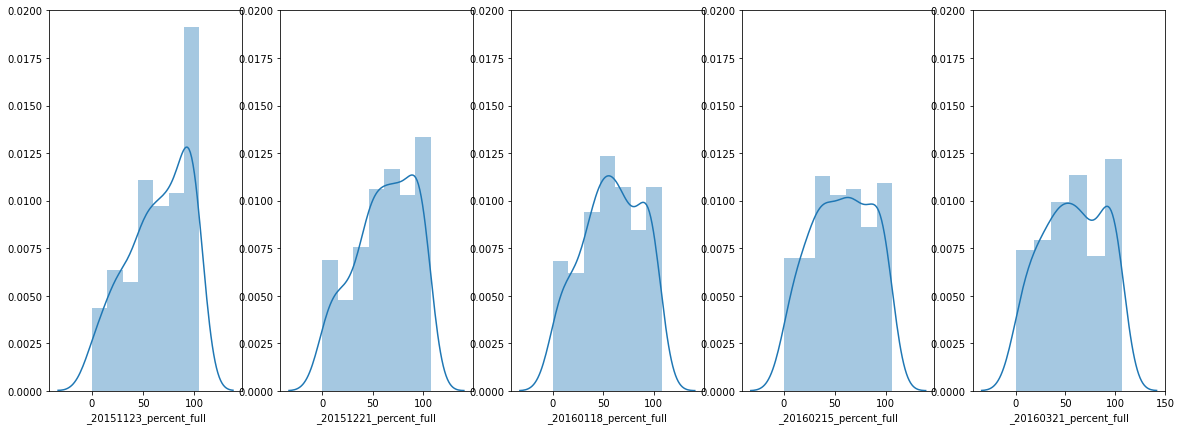

In [347]:
# Distplot providing a visial comparison of water levels across all dams 
# during certain months of the year

fig, ax =plt.subplots(1,5, figsize=(20, 7))

ax1 = sns.distplot(dams_clean['_20151123_percent_full'].dropna(), ax=ax[0])
ax1.axes.set_ylim(0,0.02)
ax2 = sns.distplot(dams_clean['_20151221_percent_full'].dropna(), ax=ax[1])
ax2.axes.set_ylim(0,0.02) 
ax3 = sns.distplot(dams_clean['_20160118_percent_full'].dropna(), ax=ax[2])
ax3.axes.set_ylim(0,0.02) 
ax4 = sns.distplot(dams_clean['_20160215_percent_full'].dropna(), ax=ax[3])
ax4.axes.set_ylim(0,0.02) 
ax5 = sns.distplot(dams_clean['_20160321_percent_full'].dropna(), ax=ax[4])
ax5.axes.set_ylim(0,0.02) 

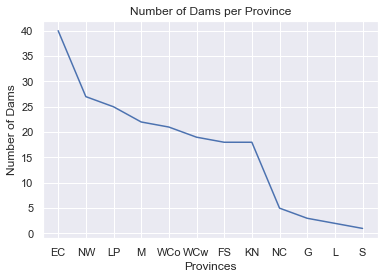

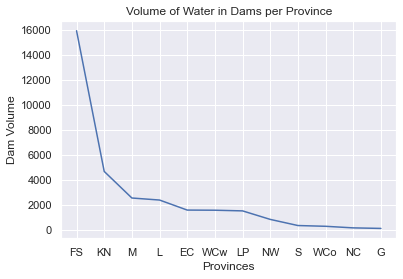

In [499]:
# Two graphs representing the number of dams per province and
# the total capacity volume per province

sns.set_style("darkgrid")

plt.title('Number of Dams per Province')
plt.xlabel('Provinces')
plt.ylabel('Number of Dams')

province_count = province_count.sort_values('number', ascending=False)
plt.plot(province_count['number'])
plt.show()

plt.title('Volume of Water in Dams per Province')
plt.xlabel('Provinces')
plt.ylabel('Dam Volume')

province_sum = province_sum.sort_values('fsc_1_000_000m_million_m', ascending=False)
plt.plot(province_sum['fsc_1_000_000m_million_m'])
plt.show()

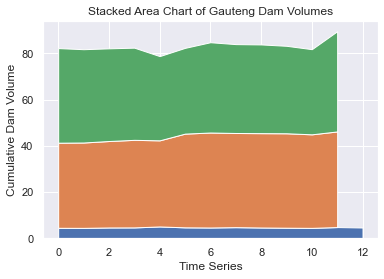

In [687]:
# A stacked area chart showing the volume contribution of three dams
# to Gauteng's total water volume. The data represents a time series
# over the record period

gauteng_dams = dams_clean[dams_clean['province'] == 'G'] 
gauteng_dams = gauteng_dams.loc[:, 'actual_lvl_20151130_million_m':'actual_lvl_20160321_million_m']
g_names = dams_clean[dams_clean['province'] == 'G']
g_names['dam_name']
gauteng_dams['dam_name'] = g_names['dam_name']

dam_1 = gauteng_dams.loc[2, :].tolist()
dam_2 = gauteng_dams.loc[9, :].tolist()
dam_3 = gauteng_dams.loc[34, :].tolist()

groupOne = dam_1[:13]
groupTwo = dam_2[:13]
groupThree = dam_3[:13]

y = np.row_stack((groupOne,groupTwo,groupThree))
x = np.arange(13)
y1, y2, y3=(groupOne,groupTwo,groupThree)
fig,ax = plt.subplots()
ax.stackplot(x,y)

plt.title("Stacked Area Chart of Gauteng Dam Volumes")
plt.xlabel("Time Series")
plt.ylabel("Cumulative Dam Volume")
plt.show()

In [782]:
gauteng_dams

,actual_lvl_20151130_million_m,actual_lvl_20151207_million_m,actual_lvl_20151214_million_m,actual_lvl_20151221_million_m,actual_lvl_20160111_million_m,actual_lvl_20160118_million_m,actual_lvl_20160201_million_m,actual_lvl_20160208_million_m,actual_lvl_20160215_million_m,actual_lvl_20160229_million_m,actual_lvl_20160307_million_m,actual_lvl_20160314_million_m,actual_lvl_20160321_million_m,dam_name
2,4.537,4.511,4.683,4.709,5.122,4.736,4.669,4.816,4.669,4.577,4.511,4.857,4.669,Bon Accord Dam
9,36.804,36.913,37.388,37.868,37.241,40.531,41.079,40.726,40.804,40.843,40.453,41.356,NaN,Roodeplaat Dam
34,40.912,40.353,40.076,39.868,36.430,37.091,39.045,38.434,38.366,37.826,36.826,43.340,45.084,Bronkhorstspruit Dam


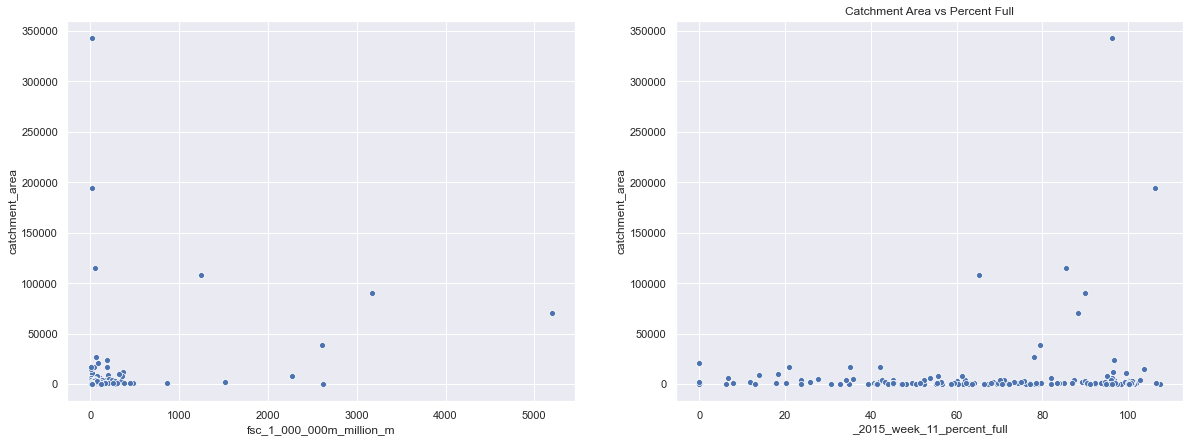

In [700]:
# Two scatter plots comparing the catchment area sizes with:
# 1) Total dam design capacity
# 2) Percent full in 2015

fig, ax =plt.subplots(1,2, figsize=(20, 7))

plt.title('Dam Capacity vs Catchment Area')
ax1 = sns.scatterplot(x='fsc_1_000_000m_million_m', y='catchment_area', data=dams_clean, ax=ax[0])

plt.title('Catchment Area vs Percent Full')
ax2 = sns.scatterplot(x='_2015_week_11_percent_full', y='catchment_area', data=dams_clean, ax=ax[1])